In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
hello = pd.read_csv("sgemm_product.csv")
hello.head(n=10)

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81
5,16,16,16,8,8,8,8,2,1,1,0,1,0,1,81.10,82.41,87.01,82.14
6,16,16,16,8,8,8,8,2,1,1,0,1,1,0,83.31,82.86,88.60,82.97
7,16,16,16,8,8,8,8,2,1,1,0,1,1,1,93.13,94.30,96.19,94.43
8,16,16,16,8,8,8,8,2,1,1,1,0,0,0,117.38,116.95,124.15,117.83
9,16,16,16,8,8,8,8,2,1,1,1,0,0,1,85.76,85.30,86.96,87.19


In [4]:
hello.describe

<bound method NDFrame.describe of         MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI  VWM  VWN  STRM  STRN  \
0        16   16   16      8      8      8      8    2    1    1     0     0   
1        16   16   16      8      8      8      8    2    1    1     0     0   
2        16   16   16      8      8      8      8    2    1    1     0     0   
3        16   16   16      8      8      8      8    2    1    1     0     0   
4        16   16   16      8      8      8      8    2    1    1     0     1   
...     ...  ...  ...    ...    ...    ...    ...  ...  ...  ...   ...   ...   
241595  128  128   32     32     32     32     32    8    4    4     1     0   
241596  128  128   32     32     32     32     32    8    4    4     1     1   
241597  128  128   32     32     32     32     32    8    4    4     1     1   
241598  128  128   32     32     32     32     32    8    4    4     1     1   
241599  128  128   32     32     32     32     32    8    4    4     1     1   

     

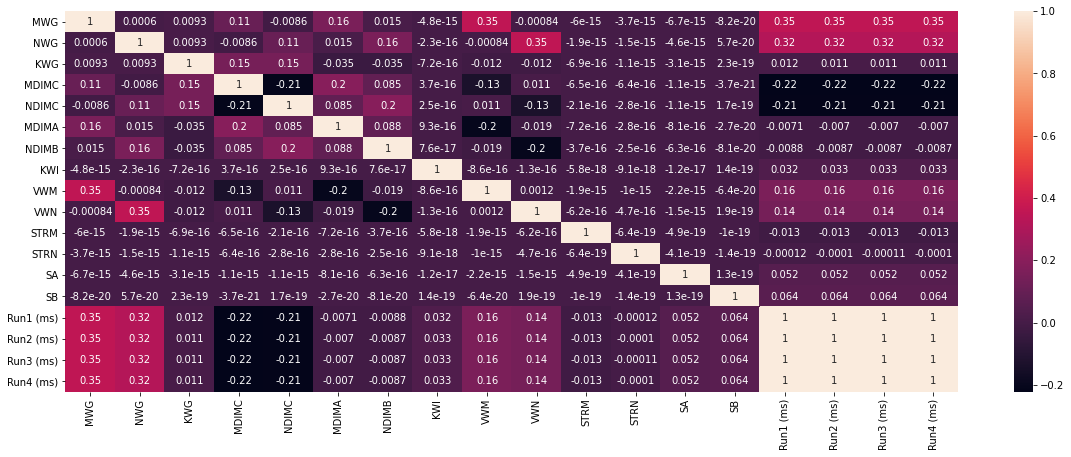

In [5]:
plt.figure(figsize=(20,7))
sns.heatmap(hello.corr(), annot=True)
plt.show()

In [6]:
hello = hello.rename(columns = {'Run1 (ms)': 'Run1', 'Run2 (ms)': 'Run2', 'Run3 (ms)': 'Run3', 'Run4 (ms)': 'Run4'}, inplace = False)

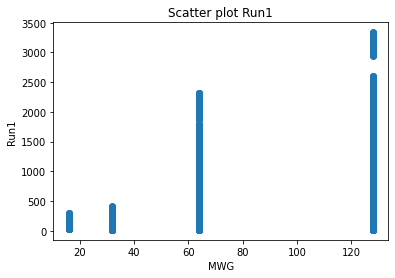

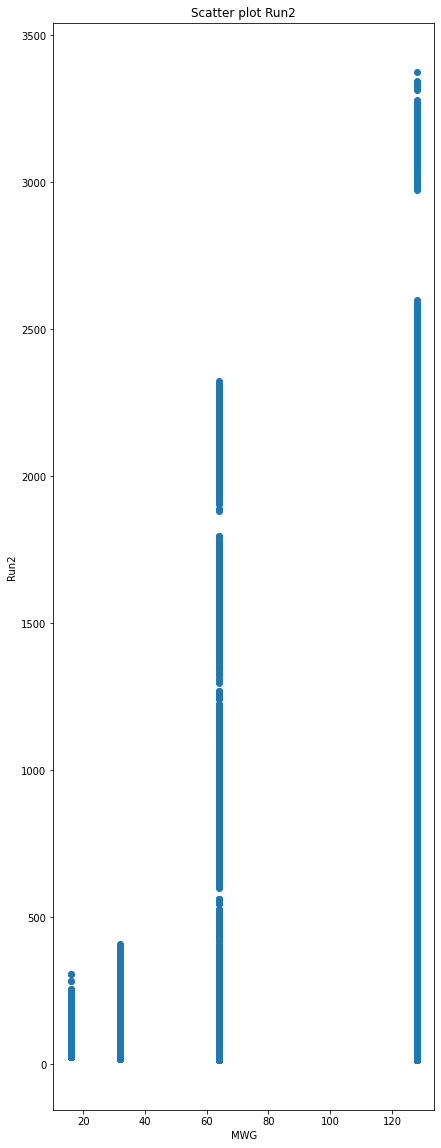

<Figure size 1080x1440 with 0 Axes>

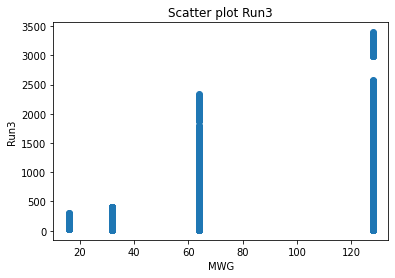

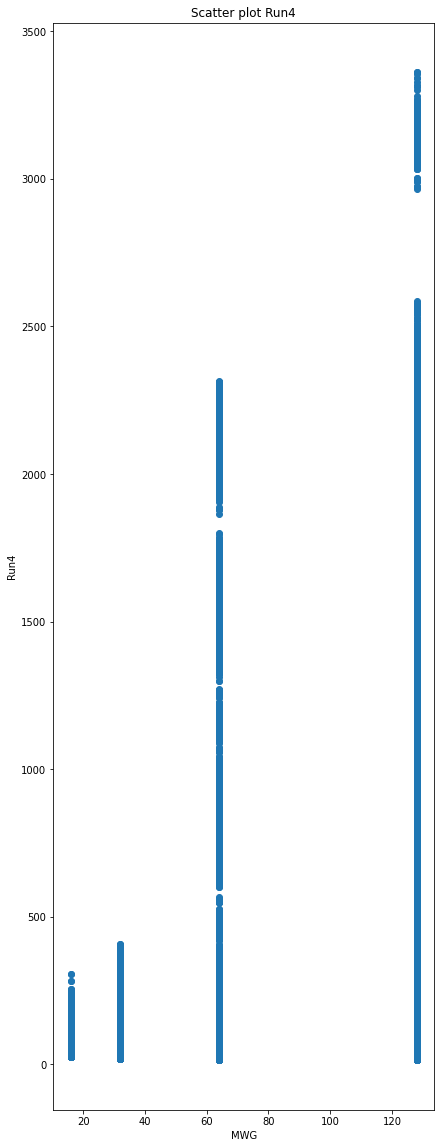

<Figure size 1080x1440 with 0 Axes>

In [7]:
plt.subplot(1,1,1)
plt.title('Scatter plot Run1')
plt.scatter(x=hello.MWG,y=hello.Run1)
plt.xlabel('MWG')
plt.ylabel('Run1')
plt.figure(figsize=(15,20))
plt.subplot(1,2,2)
plt.title('Scatter plot Run2')
plt.scatter(x=hello.MWG,y=hello.Run2)
plt.xlabel('MWG')
plt.ylabel('Run2')
plt.figure(figsize=(15,20))
plt.show()
plt.subplot(1,1,1)
plt.title('Scatter plot Run3')
plt.scatter(x=hello.MWG,y=hello.Run3)
plt.xlabel('MWG')
plt.ylabel('Run3')
plt.figure(figsize=(15,20))
plt.subplot(1,2,2)
plt.title('Scatter plot Run4')
plt.scatter(x=hello.MWG,y=hello.Run4)
plt.xlabel('MWG')
plt.ylabel('Run4')
plt.figure(figsize=(15,20))
plt.show()

In [8]:
X = hello.drop('Run4', axis=1)
y = hello['Run1']

In [9]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=84)

In [10]:
model = LinearRegression()
scores = cross_val_score(model, X_train, y_train, cv= 5)
print(scores)

[1. 1. 1. 1. 1.]


In [11]:
model=model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [12]:
MSE = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean squared error: ', MSE)
print('R2 Score: ', r2)

Mean squared error:  6.396405036027364e-25
R2 Score:  1.0


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
model_1=make_pipeline(StandardScaler(),LinearRegression())
model_1.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [14]:
model_1.score(X_test,y_test)

1.0